# Hypothesis testing problem

### **Exercise 1**

#### ANOVA

Suppose that a study wants to check if there is a significant difference between the goal averages of soccer players depending on the position in which they play. In case there is a difference, you want to know which positions differ from the rest.

NOTE: You must replace the values <<<FIXME>>>.

**Exercise: Load data from "datos_laliga.csv". It contains a sample of randomly selected players.**

In [3]:
import pandas as pd
my_data = pd.read_csv("assets/datos_laliga.csv")
my_data

,id_player,position,average
0,id_189,DC,0.310
1,id_85,DC,0.306
2,id_105,DC,0.320
3,id_34,DC,0.329
4,id_32,DC,0.369
...,...,...,...
322,id_231,DC,0.381
323,id_20,MP,0.310
324,id_294,DC,0.340
325,id_218,DC,0.305


In [7]:
my_data.describe()

,average
count,327.000000
mean,0.332159
std,0.035702
min,0.174000
25%,0.309000
50%,0.331000
75%,0.354500
max,0.437000


**Exercise: Identify the number of groups and number of observations per group to determine if it is a balanced model. The mean and standard deviation of the group are also calculated.**

In [9]:
pd.crosstab(my_data["position"],columns=["DC" "MO" "MP""P"])
#DC: Delantero centro
#MO: Medio ofensivo
#MP: Media punta
#P: Puntero

col_0,DCMOMPP
position,
DC,154
MO,14
MP,120
P,39


**Exercise: Calculate the mean and standar deviation by position**

In [10]:
my_data.groupby('position')['average'].agg('mean')

position
DC    0.331526
MO    0.347786
MP    0.334250
P     0.322615
Name: average, dtype: float64

**Exercise: Calculate the standard deviation by position**

In [11]:

my_data.groupby('position')['average'].agg('std')

position
DC    0.037095
MO    0.036037
MP    0.029444
P     0.045132
Name: average, dtype: float64

Since the number of observations per group is not constant, it is an unbalanced model. It is important to take this into account when checking the conditions of normality and homoscedasticity (s1 = s2 = s3 = s4). The most useful graphical representation before performing an ANOVA is the Box-Plot model.

**Exercise: Plot a boxplot for each position**

In [14]:
pip install plotnine

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/26/8a/6a3705065701b54cacef9979bcbdd468183cbcebf87dd6da39bbb7d1cf7a/plotnine-0.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for mizani<0.10.0,>0.9.0 from https://files.pythonhosted.org/packages/a2/cd/b9a59133236a3a0554a9197c7951e61d78a69e906ae377ece19c0070cf81/mizani-0.9.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     ----- --------------------------------- 30.7/233.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 233.8/233.8 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---- ----------------------------------- 1.0/9.2 MB 33.4 MB/s eta 0:00:01
     ---- ----------------------------------- 1.0/9.2 MB 33.4 MB/s eta 0:00:01
     ---- ----------------------------------- 1.0/9.2 MB 33.4 MB/s eta 0:00:01
     --------- ------------------------------ 

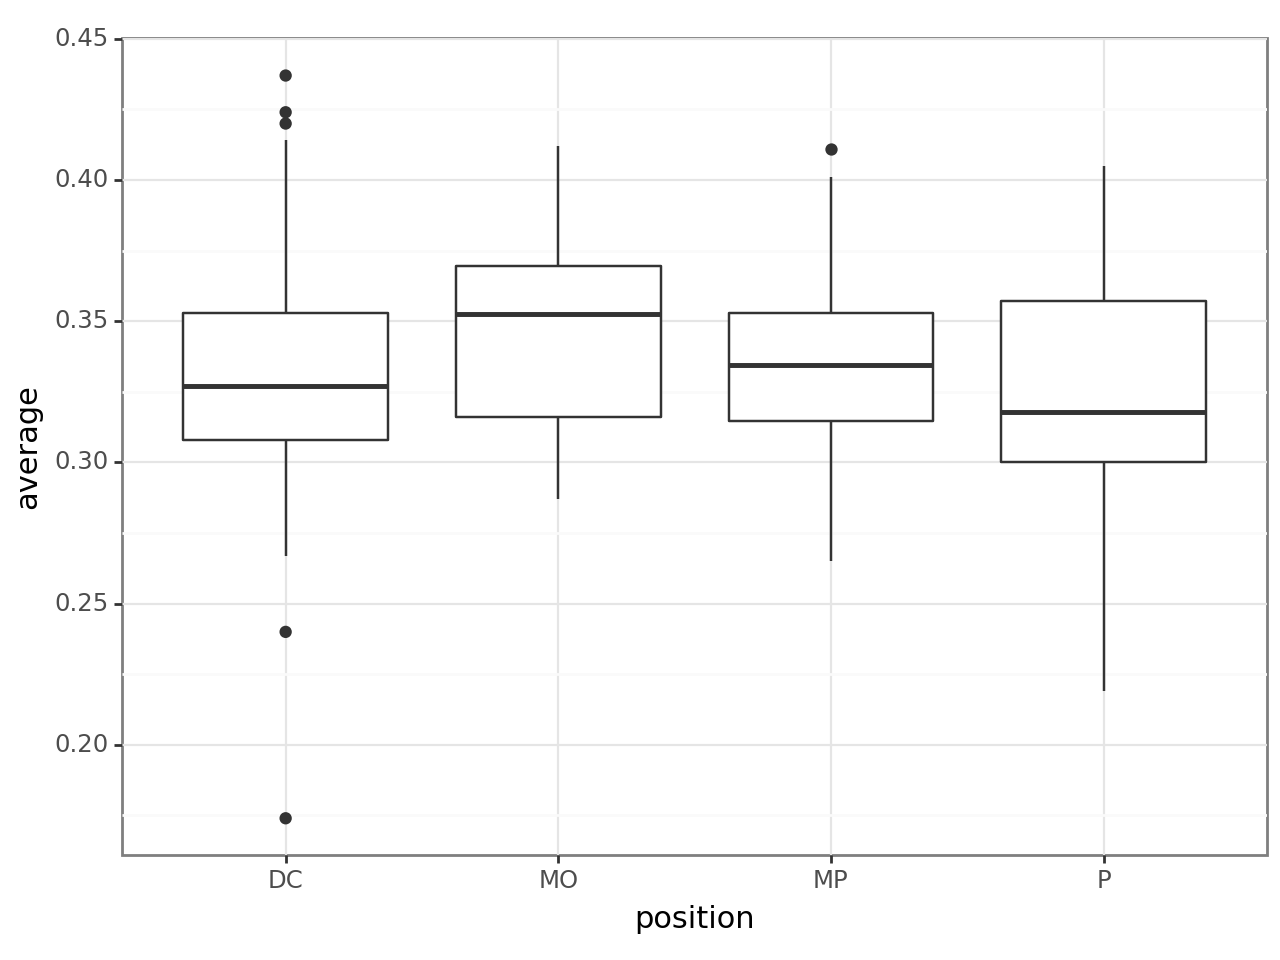

<Figure Size: (640 x 480)>

In [15]:
# Boxplots
# This is another way and popular package used in R (ggplot)
from plotnine import *

(
    ggplot(my_data)  # What data to use
    + aes(x="position", y="average")  # What variable to use
    + geom_boxplot()  # Geometric object to use for drawing
    + theme_bw()
)

#### Independence

The total sample size is <10% of the population of all players in the league. The groups (categorical variable) are independent of each other since a random sample of players from the entire league (not just from the same team) has been made.

Normal distribution of observations: The quantitative variable must be distributed in a normal way in each of the groups. The normality study can be done graphically (qqplot) or with a hypothesis test.

**Exercise: Make an analysis about normal distribution for each position**

In [2]:
import numpy as np 
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats

measurements = my_data.loc[my_data["position"] == "P","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("P")
plt.show()

measurements = my_data.loc[my_data["position"] == "MO","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MO")
plt.show()

measurements = my_data.loc[my_data["position"] == "DC","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("DC")
plt.show()

measurements = my_data.loc[my_data["position"] == "MP","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MP")
plt.show()

NameError: name 'my_data' is not defined

**Exercise: make the boxplot for each position, what you can say about them?**

In [4]:
!pip install plotly
!pip install ipykernel

In [2]:
# Using plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "P","average"]))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "MO","average"]))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "DC","average"]))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "MP","average"]))
fig.show()

**Exercise: Use the Kolmogorov-Smirnov test or with or without the Lilliefors correction in order to know the normality distribution.**

In [4]:
# Beginner way to do it

from statsmodels.stats.diagnostic import lilliefors

my_df = pd.DataFrame(index=np.arange(len(np.unique(my_data["position"]))), columns=["position", "D_statistic", "p_value"])
my_df["position"] = np.unique(my_data["position"])

for position in my_df["position"]:
    my_data_subset = my_data.loc[my_data["position"] == position,:]
    D_statistic, p_value = lilliefors(my_data_subset.average)
    my_df.loc[my_df["position"]==position,["D_statistic", "p_value"]] = D_statistic, p_value
    
print(my_df)

  position D_statistic   p_value
0       DC    0.070653  0.084495
1       MO    0.112049  0.903567
2       MP    0.044082  0.855077
3        P    0.087208  0.634941


In [6]:
#Another way to do it (Highly recommendable)
my_data.groupby("position")["average"].apply(lilliefors)

position
DC    (0.07065325441241377, 0.08449497937163018)
MO     (0.11204872375044372, 0.9035667916170158)
MP    (0.044082291017247144, 0.8550765299661607)
P      (0.08720833565943192, 0.6349406883319556)
Name: average, dtype: object

The hypothesis tests do not show evidence of a lack of normality.

Constant variance between groups (homoscedasticity):

Given that there is a group (DC) that is at the limit to accept that it is distributed in a normal way, the Fisher and Bartlett tests are not recommended. Instead it is better to use a test based on the median Levene test or the Fligner-Killeen test.

**Exercise: use the fligner and levene functions from scipy.stats in order to know the homocedasticy**

In [8]:
from scipy import stats

values_array = pd.DataFrame(my_data.groupby("position")["average"]).to_numpy()

print(stats.fligner(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

print(stats.levene(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

# stats.fligner(values_array[:,1]) # It doesn't work, please analyse

FlignerResult(statistic=6.97244018401731, pvalue=0.07278140457833458)
LeveneResult(statistic=2.6056585191080566, pvalue=0.051799415350941756)


There is no significant evidence of lack of homoscedasticity in either of the two tests.

The study of the conditions can be carried out after calculating the ANOVA, since if they are not fulfilled, it does not make much sense to continue. However, the most appropriate way to verify that the necessary conditions are satisfied is by studying the model residuals once the ANOVA has been generated.

**Exercise: make an ANOVA table and analyze the p-value using the packages statsmodels and the bioinfokit**

In [9]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('average ~ position', data=my_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
position,0.007557,3.0,1.994349,0.114693
Residual,0.407984,323.0,NaN,NaN


In [12]:
!pip install bioinfokit

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.2-py3-none-any.whl size=58844 sha256=a7a55d8f6609f59759f11ec53e797ba16b13c90a691d197fce53bb4f138eafb4
  Stored in directory: c:\users\tomuz\appdata\local\pip\cache\wheels\fd\a9\3c\f372ce737c3002d9cd393140f53cbbf3f6b92d4b3fa68ed88d
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33037 sha256=e86db0b0f89e7b6990855f9f98a99276ab9a35d8829d27199420aeaf8dbe31ff
  Stored in directory: c:\users\tomuz\appdata\local\pip\cache\wheels\25\de\d4\29dfc5d4520b956df7bc54a8464ad053042918bc525e88bf

In [13]:
# ANOVA with package bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=my_data, res_var='value', anova_model='average ~ position')
res.anova_summary
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
position,3.0,0.007557,0.002519,1.994349,0.114693
Residual,323.0,0.407984,0.001263,NaN,NaN


**Exercise: make a plot of the fitted values vs residuals. Make the plot of the Standardized Residuals. Make the histogram of the residuals.**

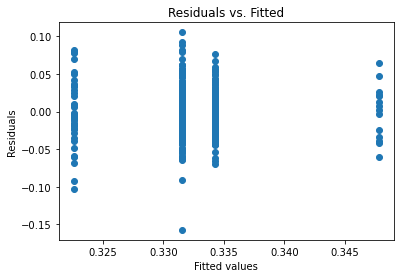

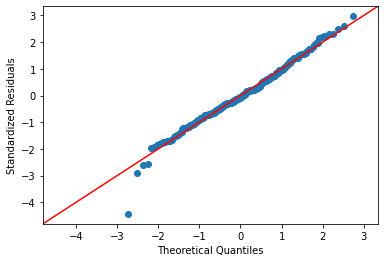

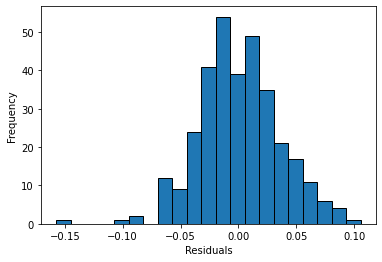

In [14]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.scatter(res.anova_model_out.fittedvalues, res.anova_model_out.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Given that the p-value is higher than 0.05, there is not enough evidence to consider that at least two means are different. The graphical representation of the residuals does not show lack of homoscedasticity (graph 1) and in the qqplot the residuals are distributed very close to the normal line (graph 2 and 3).

### **Exercise 2**

#### T-TEST INDEPENDENT

A professor gives online lectures. Later, he uploads recorded lectures to the cloud for students who followed the course asynchronously (those who did not attend the lesson but later watched the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.

```py
synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]


asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]
```

Conduct the hypothesis testing to check whether the professor’s belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.

**1. Defining Hypothesis**

H₀: μₛ≤μₐ

H₁: μₛ>μₐ

**2. Assumption Check**

H₀: The data is normally distributed.

H₁: The data is not normally distributed.

Assume that α=0.05. If the p-value is >0.05, it can be said that data is normally distributed.

In [15]:
# import libraries
import numpy as np
from scipy import stats
import pandas as pd

In [17]:
#variables
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])

In [18]:
#check normality
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")  

H₀: The variances of the samples are the same.

H₁: The variances of the samples are different.

In [19]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")


It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). Suppose the resulting p-value of Levene’s test is less than the significance level (typically 0.05). In that case, the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances.

In [21]:
#check_variance_homogeneity
check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


Are assumptions satisfied?

In [22]:
#perform the parametric version of the test for 2 groups and unpaired data.
ttest,p_value = stats.ttest_ind(sync,asyncr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


Macke a conclusion

In [ ]:
#At this significance level, there is enough evidence to conclude that the average grade of the students who follow the course synchronously is higher than the students who follow the course asynchronously.